In [19]:
import pandas as pd
%matplotlib inline

In [4]:
incident_supplemental = pd.read_csv('../output/incidents_supplemented_2.csv', index_col=0)
agency_reporting = pd.read_csv('../output/table_12_2004-2015.csv', index_col=0)

In [5]:
incident_supplemental.head()

,date,state,religion,sexual_orientation,disability,gender,gender_identity,race_corrected,est_pop,race_religion_ethnicity_enh_penalty,...,institutional_vandalism_present,cross_burning_present,all_count,race_corrected_per_capita,religion_per_capita,sexual_orientation_per_capita,disability_per_capita,gender_per_capita,gender_identity_per_capita,all_count_per_capita
0,2015,Alabama,0,2,0,0.0,0.0,8.0,4858979,YES,...,1,1,10.0,0.000002,0.000000,4.116091e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000002
1,2015,Alaska,0,1,0,0.0,NaN,7.0,738432,YES,...,0,0,8.0,0.000009,0.000000,1.354221e-06,0.000000e+00,0.000000e+00,NaN,0.000011
2,2015,Arizona,52,57,5,0.0,0.0,162.0,6828065,YES,...,1,1,276.0,0.000024,0.000008,8.347899e-06,7.322719e-07,0.000000e+00,0.000000e+00,0.000040
3,2015,Arkansas,0,2,0,0.0,0.0,3.0,2978204,NO,...,1,0,5.0,0.000001,0.000000,6.715457e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000002
4,2015,California,191,188,4,1.0,26.0,427.0,39144818,YES,...,1,1,837.0,0.000011,0.000005,4.802679e-06,1.021847e-07,2.554617e-08,6.642003e-07,0.000021


In [7]:
incident_supplemental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 592
Data columns (total 28 columns):
date                                   593 non-null int64
state                                  593 non-null object
religion                               593 non-null int64
sexual_orientation                     593 non-null int64
disability                             593 non-null int64
gender                                 148 non-null float64
gender_identity                        147 non-null float64
race_corrected                         593 non-null float64
est_pop                                593 non-null int64
race_religion_ethnicity_enh_penalty    593 non-null object
sexual_orientation_enh_penalty         593 non-null object
gender_enh_penalty                     593 non-null object
gender_identity_enh_penalty            593 non-null object
disability_enh_penalty                 593 non-null object
other_enh_penalty                      593 non-null object
civil_action

In [6]:
agency_reporting.head()

,Participating State,date,Number of Participating Agencies,Population Covered,Agencies Submitting Incident Reports,Total Number of Incidents Reported
1,Alabama,2004,51,527267.0,3,3
2,Alaska,2004,1,273714.0,1,9
3,Arizona,2004,82,5554597.0,19,224
4,Arkansas,2004,192,1632735.0,50,93
5,California,2004,725,35893799.0,245,1393


In [8]:
agency_reporting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 50
Data columns (total 6 columns):
Participating State                     599 non-null object
date                                    599 non-null int64
Number of Participating Agencies        599 non-null int64
Population Covered                      599 non-null float64
Agencies Submitting Incident Reports    599 non-null int64
Total Number of Incidents Reported      599 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 32.8+ KB


In [9]:
agency_reporting = agency_reporting.rename(columns={'Participating State' : 'state'})

In [14]:
agency_reporting['state'] = agency_reporting['state'].replace('District of Columbia', 'DC')

In [15]:
combined_data = pd.merge(incident_supplemental, agency_reporting, how='outer', on=['state', 'date'])

In [16]:
combined_data

,date,state,religion,sexual_orientation,disability,gender,gender_identity,race_corrected,est_pop,race_religion_ethnicity_enh_penalty,...,religion_per_capita,sexual_orientation_per_capita,disability_per_capita,gender_per_capita,gender_identity_per_capita,all_count_per_capita,Number of Participating Agencies,Population Covered,Agencies Submitting Incident Reports,Total Number of Incidents Reported
0,2015,Alabama,0.0,2.0,0.0,0.0,0.0,8.0,4858979.0,YES,...,0.000000e+00,4.116091e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,34,1252146.0,3,10
1,2015,Alaska,0.0,1.0,0.0,0.0,NaN,7.0,738432.0,YES,...,0.000000e+00,1.354221e-06,0.000000e+00,0.000000e+00,NaN,0.000011,33,734820.0,4,8
2,2015,Arizona,52.0,57.0,5.0,0.0,0.0,162.0,6828065.0,YES,...,7.615628e-06,8.347899e-06,7.322719e-07,0.000000e+00,0.000000e+00,0.000040,101,6622880.0,21,276
3,2015,Arkansas,0.0,2.0,0.0,0.0,0.0,3.0,2978204.0,NO,...,0.000000e+00,6.715457e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,279,2754543.0,4,5
4,2015,California,191.0,188.0,4.0,1.0,26.0,427.0,39144818.0,YES,...,4.879318e-06,4.802679e-06,1.021847e-07,2.554617e-08,6.642003e-07,0.000021,730,39137326.0,213,837
5,2015,Colorado,16.0,20.0,3.0,0.0,3.0,65.0,5456574.0,YES,...,2.932243e-06,3.665304e-06,5.497955e-07,0.000000e+00,5.497955e-07,0.000020,234,5445853.0,42,107
6,2015,Connecticut,19.0,9.0,4.0,0.0,0.0,62.0,3590886.0,YES,...,5.291173e-06,2.506345e-06,1.113931e-06,0.000000e+00,0.000000e+00,0.000026,95,3399068.0,44,93
7,2015,Delaware,2.0,0.0,0.0,0.0,0.0,9.0,945934.0,YES,...,2.114312e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000012,60,945934.0,7,11
8,2015,DC,5.0,27.0,0.0,0.0,10.0,23.0,672228.0,YES,...,7.437953e-06,4.016494e-05,0.000000e+00,0.000000e+00,1.487591e-05,0.000097,2,672228.0,2,65
9,2015,Florida,13.0,14.0,0.0,0.0,1.0,44.0,20271272.0,YES,...,6.413016e-07,6.906325e-07,0.000000e+00,0.000000e+00,4.933090e-08,0.000004,38,5356877.0,36,72


In [17]:
combined_data['percent_of_population_covered'] = combined_data['Population Covered'] / combined_data['est_pop']

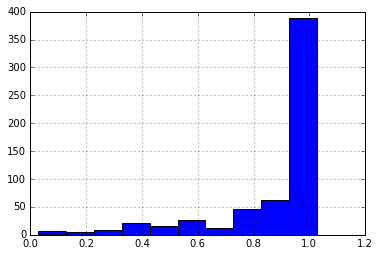

In [20]:
combined_data['percent_of_population_covered'].hist()

In [22]:
combined_data[['all_count_per_capita', 'percent_of_population_covered']].corr()

,all_count_per_capita,percent_of_population_covered
all_count_per_capita,1.000000,0.353179
percent_of_population_covered,0.353179,1.000000


In [23]:
combined_data.to_csv('../output/incident_aggregated_with_agencies.csv')